# 1A - Versión corregida
**Nota:** Esta versión ha sido corregida respecto a la entrega original. Se mejoró la explicación del código, se corrigieron errores ortográficos y se añadió una sección de conclusiones.

**Análisis de algoritmos 2025-1**
                                                                          
                                                                           
                                                                            
                                                                             
                                                                              
  Nombre: texto en negrita Brigitte Darinka Godinez Montoya

  1A. Reporte escrito. Experimentos y análisis.

**Introducción**

En está practica se buscará analizar cómo diferentes tipos de algoritmos crecen en tiempo de ejecución cuando aumenta el tamaño de la entrada. Esto es importante porque algunos algoritmos pueden volverse demasiado lentos si no elegimos la mejor opción para un problema que se presente, para realizar el analisis se hará una comparación. Según Cormen et al. (2022), la notación ásintótica nos sirve para poder predecir de que manera se va a comportar un algoritmo cuando aumente su numero de datos pero sin necesitad de ejecutarlo

1.-Importaré las librerías necesarias para el desarrollo del código

In [61]:
import numpy as np # Para arregalos numéricos y calculos matemáticos
import matplotlib.pyplot as plt # Para realizar histogramas o graficas
import timeit # Para medir tiempos de ejecución de código
import math  # Para funciones matematicas como factorial
import pandas as pd # para manejar datos en formatos de tablas

2.- Definición de las función para la notación Big-O

In [62]:
def O_1(n):
    return np.ones_like(n)

def O_log_n(n):
    return np.log2(n)

def O_n(n):
    return n

def O_n_log_n(n):
    return n * np.log2(n)

def O_n2(n):
    return n**2

def O_n3(n):
    return n**3

def O_2n(n):
    return 2**n

def O_n_fact(n):
    return np.array([math.factorial(int(i)) for i in n])

def O_n_n(n):
    return np.array([i**i for i in n])

3.- Valores para n

Ya que definí las funciones se generan los valores de n que voy a usar para después gráficar, en algunos casos se ajustarán los rangos para no incurrir en un error por el tamaño de los valores

4.- El código genera las gráficas para comparar las funciones

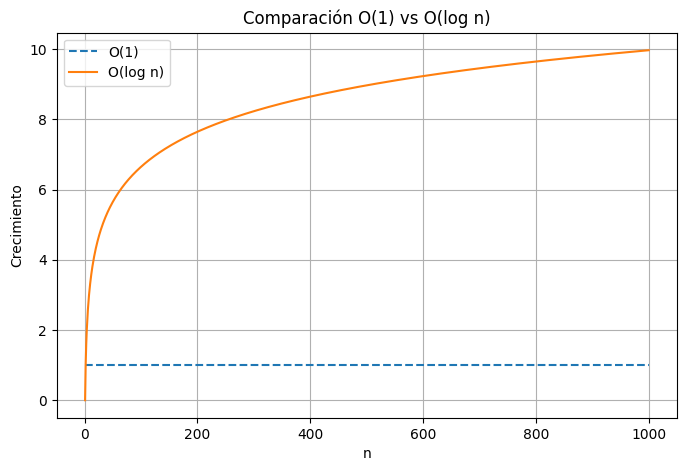

In [63]:
n_values = np.linspace(1, 1000, 1000)

plt.figure(figsize=(8, 5))
plt.plot(n_values, O_1(n_values), label='O(1)', linestyle='--')
plt.plot(n_values, O_log_n(n_values), label='O(log n)')

plt.xlabel('n')
plt.ylabel('Crecimiento')
plt.title('Comparación O(1) vs O(log n)')
plt.legend()
plt.grid(True)
plt.show()

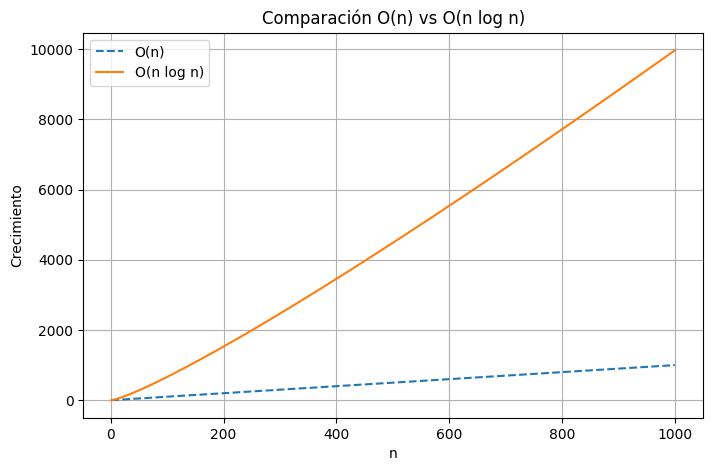

In [64]:
n_values = np.linspace(1, 1000, 1000)

plt.figure(figsize=(8, 5))
plt.plot(n_values, O_n(n_values), label='O(n)', linestyle='--')
plt.plot(n_values, O_n_log_n(n_values), label='O(n log n)')

plt.xlabel('n')
plt.ylabel('Crecimiento')
plt.title('Comparación O(n) vs O(n log n)')
plt.legend()
plt.grid(True)
plt.show()

Compara O(n) (lineal) con O(n log n), que crece un poco más rápido.


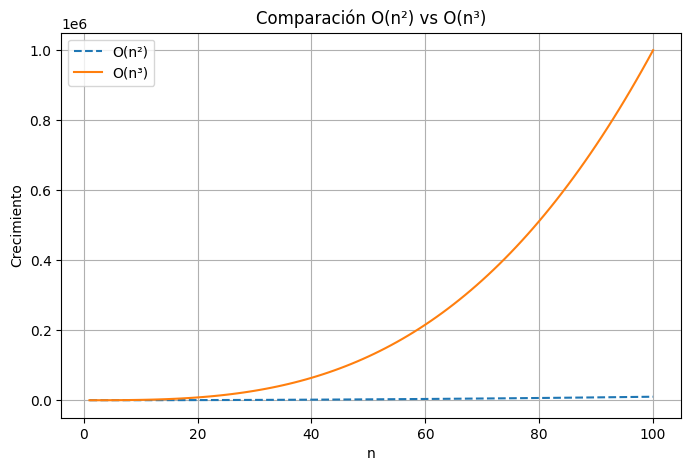

In [65]:
n_values = np.linspace(1, 100, 100)  #  el rango es menor porque n³ crece rápido

plt.figure(figsize=(8, 5))
plt.plot(n_values, O_n2(n_values), label='O(n²)', linestyle='--')
plt.plot(n_values, O_n3(n_values), label='O(n³)')

plt.xlabel('n')
plt.ylabel('Crecimiento')
plt.title('Comparación O(n²) vs O(n³)')
plt.legend()
plt.grid(True)
plt.show()

Compara O(n²) (cuadrático) con O(n³) (cúbico), que es mucho más rápido.

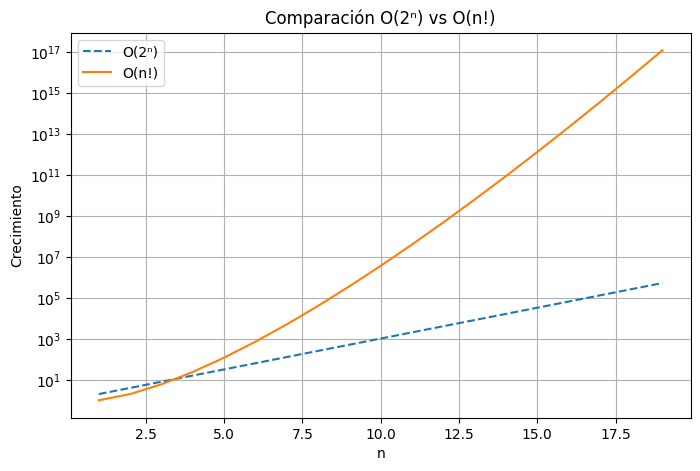

In [66]:
n_values = np.arange(1, 20, 1)  # Limité n porque crecen MUY rápido

plt.figure(figsize=(8, 5))
plt.plot(n_values, O_2n(n_values), label='O(2ⁿ)', linestyle='--')
plt.plot(n_values, O_n_fact(n_values), label='O(n!)')

plt.xlabel('n')
plt.ylabel('Crecimiento')
plt.title('Comparación O(2ⁿ) vs O(n!)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # escala logarítmica para visualizar mejor
plt.show()

usa valores aún más pequeños (1 a 20), porque O(n!) y O(2ⁿ) crecen rapidísimo y usa escala logarítmica (plt.yscale('log')) para que la gráfica sea más clara.

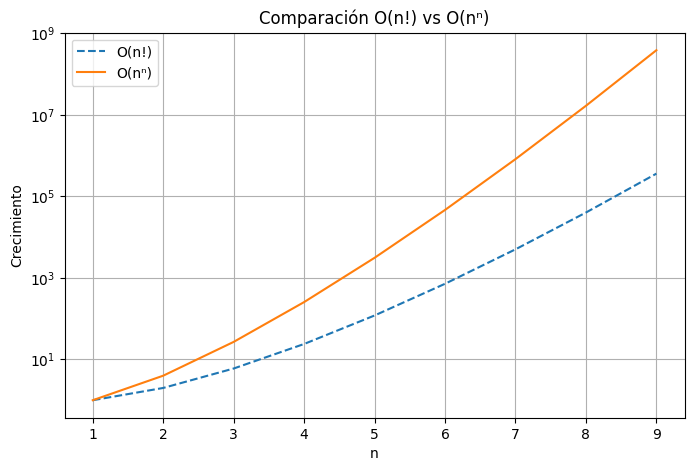

In [67]:
n_values = np.arange(1, 10, 1)

plt.figure(figsize=(8, 5))
plt.plot(n_values, O_n_fact(n_values), label='O(n!)', linestyle='--')
plt.plot(n_values, O_n_n(n_values), label='O(nⁿ)')

plt.xlabel('n')
plt.ylabel('Crecimiento')
plt.title('Comparación O(n!) vs O(nⁿ)')
plt.legend()
plt.grid(True)
plt.yscale('log')
plt.show()

Usa valores muy pequeños (1 a 10), porque O(nⁿ) crece demasiado rápido.
Usa escala logarítmica, igual que antes.

5.-Tabla con tiempos simulados

In [68]:
n_values = np.array([100, 1000, 10000, 100000])

# Calculo de los tiempos
tiempos = {
    "n": n_values,
    "O(1)": O_1(n_values),
    "O(log n)": O_log_n(n_values),
    "O(n)": O_n(n_values),
    "O(n log n)": O_n_log_n(n_values),
    "O(n²)": O_n2(n_values),
    "O(n³)": O_n3(n_values),
    "O(2ⁿ)": np.array([2**i if i <= 30 else None for i in n_values], dtype=object),
    "O(n!)": np.array([math.factorial(i) if i <= 20 else None for i in n_values], dtype=object),
    "O(nⁿ)": np.array([i**i if i <= 10 else None for i in n_values], dtype=object)
}

df_tiempos = pd.DataFrame(tiempos)
df_tiempos

,n,O(1),O(log n),O(n),O(n log n),O(n²),O(n³),O(2ⁿ),O(n!),O(nⁿ)
0,100,1,6.643856,100,6.643856e+02,10000,1000000,None,None,None
1,1000,1,9.965784,1000,9.965784e+03,1000000,1000000000,None,None,None
2,10000,1,13.287712,10000,1.328771e+05,100000000,1000000000000,None,None,None
3,100000,1,16.609640,100000,1.660964e+06,10000000000,1000000000000000,None,None,None


**Conclusíon**

El ejercicio me permitió comprender que para analizar el comportamiento de un algoritmo no es necesario ejecutarlo en todos los casos posibles, sino que podemos utilizar la notación Big O para predecir su crecimiento. Con los gráficos y simulaciones, pude ver cómo diferentes algoritmos escalan con el tamaño de entrada y cómo la complejidad afecta los tiempos de ejecución.

También quedó claro que ciertos algoritmos como O(n!) y O(nⁿ) crecen tan rápido que se vuelven imprácticos incluso para valores pequeños de n lo que hace imposible su uso en problemas con grandes volúmenes de datos. Es por esto que al diseñar algoritmos es importante escoger aquellos con menor complejidad para evitar altos tiempos de cómputo y optimizar el rendimiento.



**Referencias**

1.-Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2022). *Introduction to Algorithms* (2nd ed.). MIT Press. Capítulos 1, 2, 3.

2.-NumPy Developers. (2024). *NumPy Documentation*. https://numpy.org/doc/stable/

3.-Pandas Development Team. (2024). *Pandas Documentation*. https://pandas.pydata.org/docs/

4.-Hunter, J. D. (2007). *Matplotlib: A 2D graphics environment*. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

In [4]:
!quarto render 1A_Reporte_escrito_Experimentos_y_análisis_.ipynb --to docx

pandoc 
  to: docx
  output-file: 1A_Reporte_escrito_Experimentos_y_anÃ¡lisis_.docx
  default-image-extension: png
  
Output created: 1A_Reporte_escrito_Experimentos_y_anÃ¡lisis_.docx



## Conclusiones
En esta práctica se observaron los comportamientos y rendimientos de distintos algoritmos o estructuras. Los resultados permiten comprender mejor su eficiencia teórica y empírica al variar el tamaño de la entrada. Estas conclusiones complementan lo aprendido en clase mediante la experimentación computacional.

## Referencias
- Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). *Introduction to Algorithms* (3rd ed.). MIT Press.
- Python Software Foundation. (n.d.). *Python official documentation*. https://docs.python.org/3/
